# Project - Comcast Telecom Consumer Complaints

In [1]:
import pandas as pd
import numpy as np
from pandas import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5

import warnings
warnings.filterwarnings('ignore')
#import libraries

In [2]:
def parser(x):
    return dt.strptime(x,'%d-%m-%y')
df=pd.read_csv("Comcast_telecom_complaints_data.csv",index_col=2, parse_dates=[2] ,date_parser=parser)
#Reading the dataset in a dataframe using Pandas

In [3]:
df['month']=df.index.month

In [4]:
df['month'].unique()

array([ 4,  8,  7,  5, 12,  6,  1, 11,  2,  9,  3, 10], dtype=int64)

In [5]:
df['Month']=df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'])

In [6]:
df['Month'].unique()

array(['April', 'Aug', 'July', 'May', 'Dec', 'June', 'Jan', 'Nov', 'Feb',
       'Sep', 'March', 'Oct'], dtype=object)

In [7]:
df.head()

,Ticket #,Customer Complaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Month
Date,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,April
2015-08-04,223441,Payment disappear - service got disconnected,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Aug
2015-04-18,242732,Speed and Service,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,April
2015-07-05,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,July
2015-05-26,307175,Comcast not working and no service to boot,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,May


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2224 entries, 2015-04-22 to 2015-06-24
Data columns (total 12 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
month                          2224 non-null int64
Month                          2224 non-null object
dtypes: int64(2), object(10)
memory usage: 225.9+ KB


In [9]:
df.isnull().any().sum()

0

In [10]:
df.columns.values

array(['Ticket #', 'Customer Complaint', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'month', 'Month'], dtype=object)

### Task 1 : Provide a trend chart for the number of complaints at monthly and daily granularity levels
* ##### Daily Granualrity

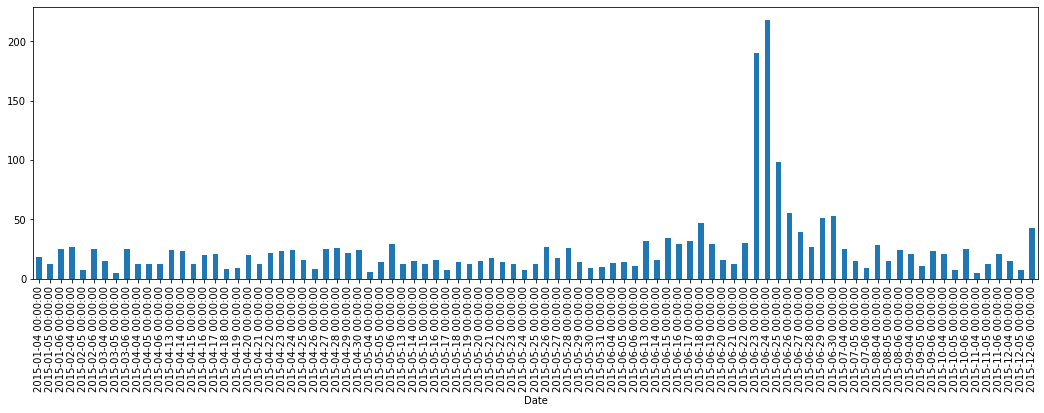

In [11]:
df['Customer Complaint'].groupby(df.index).count().plot(kind='bar',figsize=(18,5))

In [12]:
bydaily=df['Customer Complaint'].groupby(df.index).count()
bydaily=pd.DataFrame(bydaily)
bydaily

,Customer Complaint
Date,
2015-01-04,18
2015-01-05,12
2015-01-06,25
2015-02-04,27
2015-02-05,7
...,...
2015-11-05,12
2015-11-06,21
2015-12-04,15


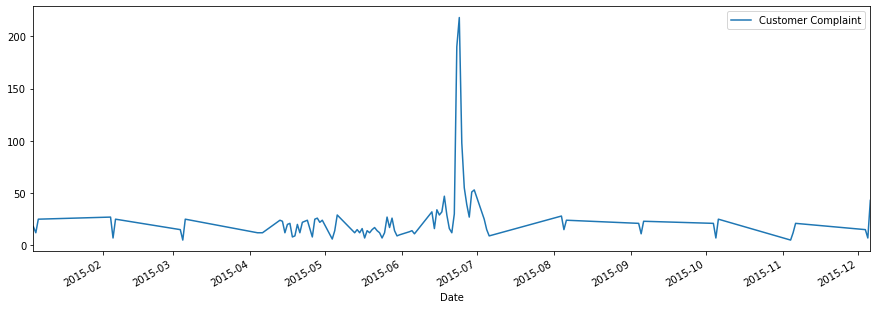

In [13]:
bydaily.plot(figsize=(15,5))

* ##### Monthly Granualrity

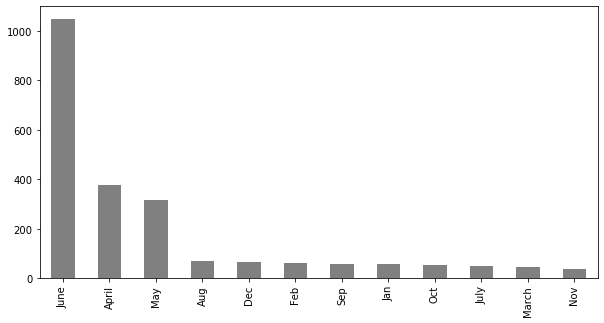

In [14]:
df['Month'].value_counts().plot(kind='bar',figsize=(10,5),color='grey')

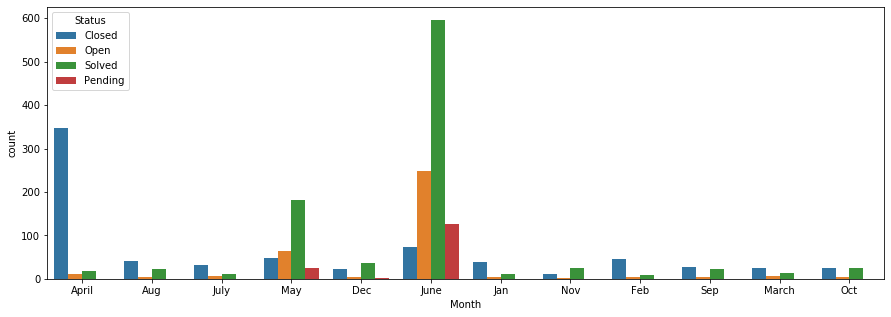

In [15]:
rcParams['figure.figsize'] = 15, 5
g1 = sns.countplot(x='Month', hue='Status', data=df)

* #### Max Monthly complaints received in June and April, May resply witch have highest rate of closed complaints also. but it indicates that in summer april to june we arre receiving complaints by highest rate
* 
#### It is clear from above graph Maximum daily complaints received in June month in last week

### Task 2 : Find out which complaints are maximum

In [16]:
from collections import Counter
c_count = Counter(df['Customer Complaint'])
d=c_count.most_common(10)
d=pd.DataFrame(d,columns=['type','count'])
d

,type,count
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Data Caps,11
5,Comcast Data Caps,11
6,Comcast Billing,11
7,Unfair Billing Practices,9
8,Internet speed,8
9,Comcast data caps,8


In [17]:
d=d.set_index('type')

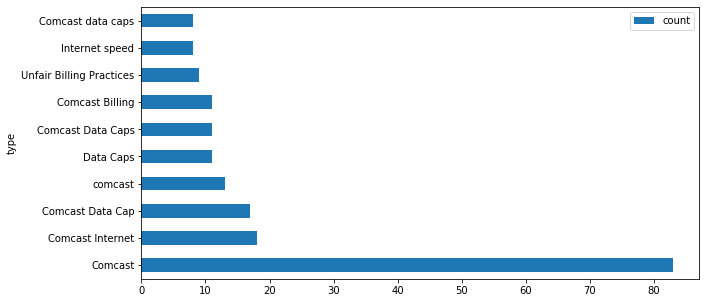

In [18]:
d.plot(kind='barh',figsize=(10,5))

* ##### max complaint received over Comcast Internet and Comcast Data Cap
### i.e. around internet issue complaint received the most

### Task 4 Create a new catergorical variable

In [19]:
df['open/closed']=df['Status'].apply(lambda x: 'Closed' if (x =='Solved'or x== 'Closed') else 'Open')
        

In [20]:
df['open/closed'].unique()

array(['Closed', 'Open'], dtype=object)

In [21]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [22]:
df.head()

,Ticket #,Customer Complaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Month,open/closed
Date,,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,April,Closed
2015-08-04,223441,Payment disappear - service got disconnected,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Aug,Closed
2015-04-18,242732,Speed and Service,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,April,Closed
2015-07-05,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,July,Open
2015-05-26,307175,Comcast not working and no service to boot,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,May,Closed


### Task 5 : Which state has max complaints

* Let's see what the distribution of complaints is by state

In [41]:
bystate = df[['Ticket #', 'State']].groupby('State').size()
bystate.head()

State
Alabama        26
Arizona        20
Arkansas        6
California    220
Colorado       80
dtype: int64

In [24]:
bystate=bystate.sort_values(ascending=False)


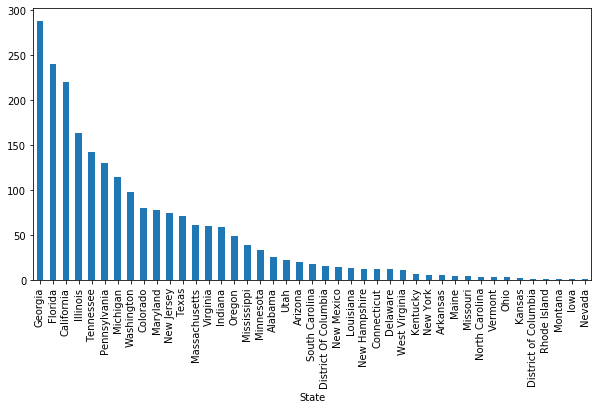

In [25]:
bystate.plot(kind='bar',figsize=(10,5))

In [26]:
##similar graph we can plot with this code also

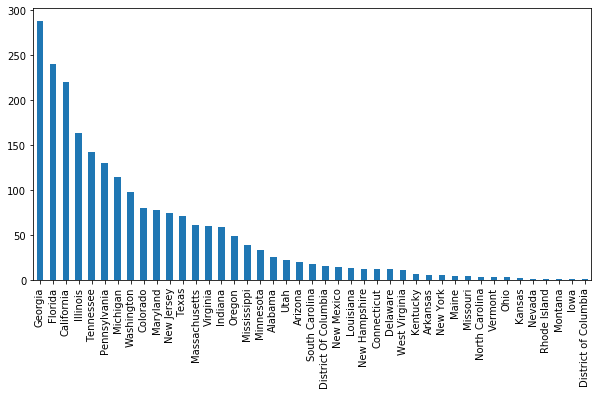

In [27]:
state=df.State.value_counts(ascending=False)
state.plot(kind='bar',figsize=(10,5))

### Georgia has max number of complaints. Georgia,Florida and california are three states from where maximum complaints were received

[Text(0, 0, 'Maryland'),
 Text(0, 0, 'Georgia'),
 Text(0, 0, 'Michigan'),
 Text(0, 0, 'California'),
 Text(0, 0, 'New Mexico'),
 Text(0, 0, 'Indiana'),
 Text(0, 0, 'Virginia'),
 Text(0, 0, 'Illinois'),
 Text(0, 0, 'Pennsylvania'),
 Text(0, 0, 'Massachusetts'),
 Text(0, 0, 'Oregon'),
 Text(0, 0, 'Texas'),
 Text(0, 0, 'New Hampshire'),
 Text(0, 0, 'Minnesota'),
 Text(0, 0, 'Tennessee'),
 Text(0, 0, 'Colorado'),
 Text(0, 0, 'Florida'),
 Text(0, 0, 'Alabama'),
 Text(0, 0, 'Washington'),
 Text(0, 0, 'New York'),
 Text(0, 0, 'New Jersey'),
 Text(0, 0, 'Maine'),
 Text(0, 0, 'Missouri'),
 Text(0, 0, 'West Virginia'),
 Text(0, 0, 'Montana'),
 Text(0, 0, 'Mississippi'),
 Text(0, 0, 'Connecticut'),
 Text(0, 0, 'Vermont'),
 Text(0, 0, 'Kentucky'),
 Text(0, 0, 'South Carolina'),
 Text(0, 0, 'Ohio'),
 Text(0, 0, 'Utah'),
 Text(0, 0, 'Delaware'),
 Text(0, 0, 'Arkansas'),
 Text(0, 0, 'Nevada'),
 Text(0, 0, 'Louisiana'),
 Text(0, 0, 'Kansas'),
 Text(0, 0, 'Arizona'),
 Text(0, 0, 'North Carolina'),
 Tex

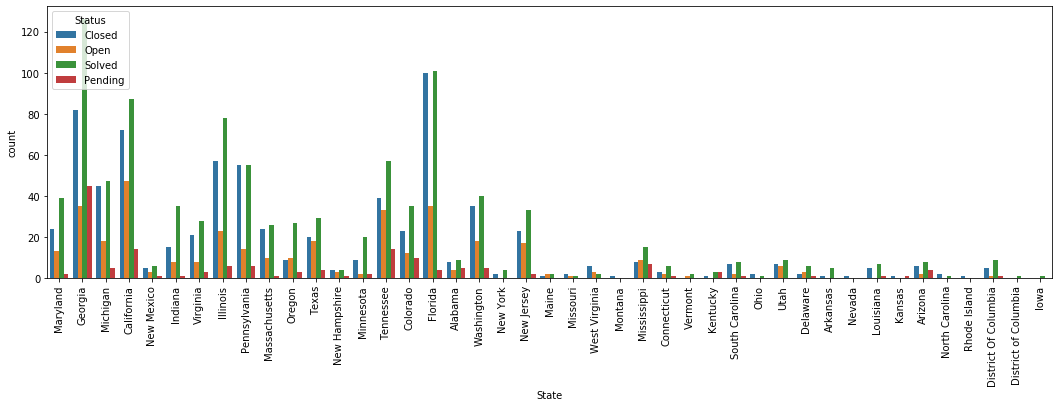

In [28]:
plt.rcParams['figure.figsize'] = (18, 5)
countplot=sns.countplot(x='State',hue='Status',data=df)
countplot.set_xticklabels(labels=df.State.unique(), rotation=90)

In [29]:
a=df.groupby(['State','open/closed'])['open/closed'].count().unstack()
a=pd.DataFrame(a)
a.head(2)

open/closed,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0


In [30]:
a['unresolved complaint percent']=(a['Open']/a['Closed']*100)

In [31]:
a

open/closed,Closed,Open,unresolved complaint percent
State,,,
Alabama,17.0,9.0,52.941176
Arizona,14.0,6.0,42.857143
Arkansas,6.0,NaN,NaN
California,159.0,61.0,38.364780
Colorado,58.0,22.0,37.931034
Connecticut,9.0,3.0,33.333333
Delaware,8.0,4.0,50.000000
District Of Columbia,14.0,2.0,14.285714
District of Columbia,1.0,NaN,NaN


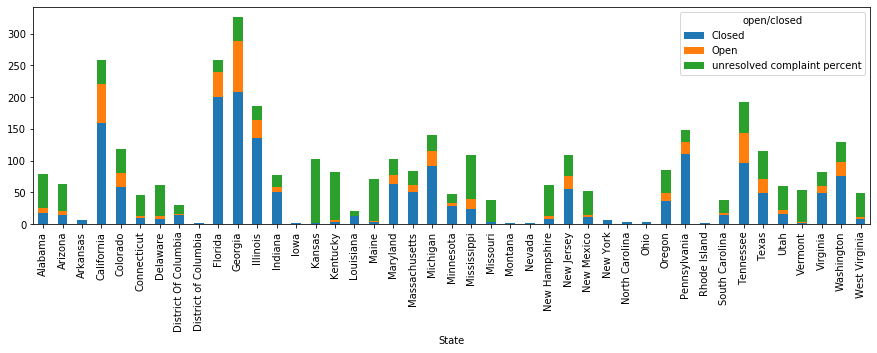

In [32]:
a.plot(kind='bar',stacked=True,figsize=(15,4))

#### from above stacked chart it is clear that max complaint states having around 70% complaint resolving rate

#### and state  Kansas havis 1.0 unresolved complaint out of 1.0 received complaint thus unresolved percentage complaint is 100%

### Task 7 : % of complaints resolved till date

In [33]:
compl=df.groupby(['Received Via','open/closed'])['Received Via'].count().unstack()
compl

open/closed,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


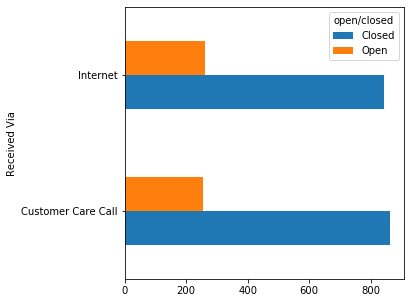

In [39]:
compl.plot(kind='barh',figsize=(5,5))

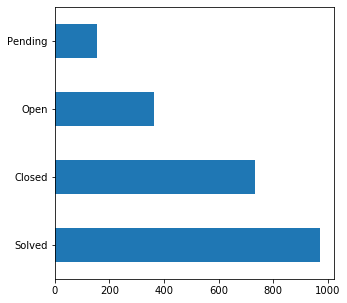

In [40]:
df['Status'].value_counts().plot(kind='barh',figsize=(5,5))

In [36]:
totcompl=len(df)
totcompl

2224

In [37]:
for x in compl.values:
    l=(x/totcompl*100)
    print(l)


[38.84892086 11.46582734]
[37.90467626 11.78057554]


In [38]:
print('Customer Care Call resolved complaints rate is 38.84%and unresolved rate is 11.46%')
print('Internet resolved complaints rate is 37.90%and unresolved rate is 11.78%')
print('Overall Complaint resolved rate is',round(((864+843)/2224)*100),'%')

Customer Care Call resolved complaints rate is 38.84%and unresolved rate is 11.46%
Internet resolved complaints rate is 37.90%and unresolved rate is 11.78%
Overall Complaint resolved rate is 77 %


## Customer Care Call resolved complaints rate is 38.84%and unresolved rate is 11.46%
## Internet resolved complaints rate is 37.90%and unresolved rate is 11.78%
## Overall Complaint resolved rate is 77 %